In [94]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score, recall_score, precision_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import pickle
from matplotlib import pyplot as plt


In [84]:
df = pd.read_csv('secondary_data.csv', sep=';')
df.columns = df.columns.str.replace("-", "_")

In [85]:
def binarize_p_or_e(cls):
    if cls =='p': 
        return True 
    else: 
        return False

In [86]:
df['class'] = df['class'].apply(lambda x: binarize_p_or_e(x))
X = pd.get_dummies(df.drop('class', axis=1))
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:

def get_best_tree(X, y, max_depth=3, random_state=42):
    model = DecisionTreeClassifier(class_weight='balanced', random_state=random_state)
    f2s = {}     
    for i in range(3, max_depth+1):
        model = DecisionTreeClassifier(class_weight='balanced', max_depth=i, splitter='random', random_state=random_state)
        model.fit(X, y)
        y_pred = model.predict(X_test)
        f2s[f"{i}"] = float(fbeta_score(y_test, y_pred, beta=2, zero_division=0))

    md = int(max(f2s, key=f2s.get))
    
    print("Best F2: " + "%f" % f2s[str(md)])
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=md, splitter='random', random_state=random_state) 
    model.fit(X, y)
    return model


model = get_best_tree(X_train, y_train, 100)
model.get_params()
    
    

Best F2: 0.999922


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 22,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'random'}

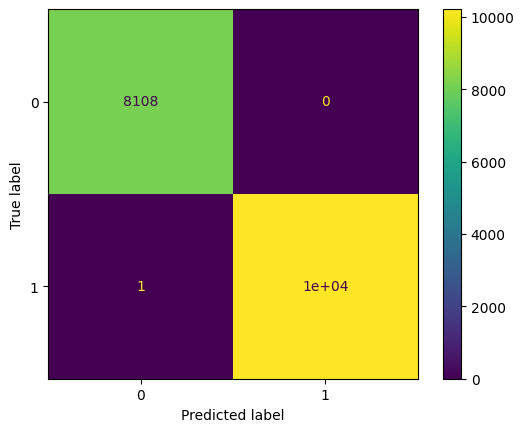

In [101]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [48]:
fi = pd.DataFrame(model.feature_importances_, columns=['importance'])
fi['feature'] = X.columns[fi.index]
fi.sort_values(by='importance', ascending=False)[:20]

,importance,feature
55,0.062380,gill_color_w
39,0.044784,gill_attachment_p
81,0.041570,stem_color_w
38,0.039922,gill_attachment_f
60,0.037541,stem_root_r
17,0.031862,cap_surface_s
43,0.031478,gill_spacing_d
82,0.030867,stem_color_y
3,0.027692,cap_shape_b
5,0.026610,cap_shape_f


array([False,  True])

In [98]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred).value_counts()

0    
True     10212
False     8109
Name: count, dtype: int64

In [99]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=1)}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=1)}")
print(f"F2: {fbeta_score(y_test, y_pred, beta=2, zero_division=1)}")

Accuracy: 0.9999454178265379
Precision: 1.0
Recall: 0.9999020855772055
F2: 0.999921666927777
